In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('data/train.csv')

In [52]:
df.head()

,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy
0,1111,22.700000,37.200,21.000000,38.000000,23.390000,37.290000,22.832857,34.942857,20.500000,...,45.360000,20.20,38.663333,12.80,760.050000,62.000000,3.5,28.0,5.65,70
1,1112,21.500000,41.045,20.500000,39.133333,22.926667,39.526667,21.700000,34.126667,18.633333,...,34.663333,19.73,37.933333,8.47,764.166667,48.166667,8.0,26.5,-1.92,210
2,1113,21.666667,38.000,22.600000,35.700000,21.890000,36.590000,22.000000,35.530000,19.000000,...,38.545000,19.79,39.430000,10.60,757.600000,57.000000,2.0,27.0,2.40,50
3,1114,23.290000,38.530,21.671429,38.000000,24.290000,36.200000,23.100000,35.090000,22.042857,...,38.600000,22.60,36.194286,11.60,760.600000,63.000000,1.0,40.0,4.67,50
4,1115,24.000000,42.560,26.830000,34.356000,26.530000,40.333333,24.500000,40.900000,21.500000,...,44.230000,22.60,44.090000,17.70,756.983333,63.000000,1.0,21.5,10.40,250


In [12]:
X = df[df.columns.difference(['Energy'])]
y = df.Energy

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [40]:
clf = RandomForestRegressor( random_state=0)

In [41]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
pred = clf.predict(X_test)

In [43]:
mean_squared_error(y_test, pred)

5785.196134347275

### That's some shit predictions we've got going..

We're expecting errors to be less than 1 to call this a good model.

Lets try to actually understand whats going on in this data.
This was just a test to see if the basic predict workflow works for us or not.

In [44]:
import seaborn as sns; sns.set()

In [49]:
cor = df.corr()

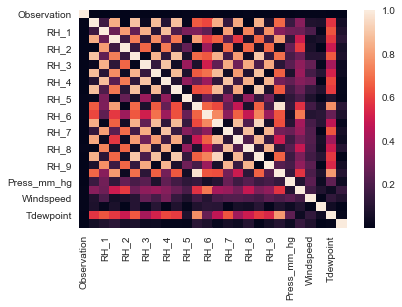

In [51]:
sns.heatmap(cor.abs())

In [55]:
df.describe()

,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy
count,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,...,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000
mean,9000.500000,21.683008,40.263077,20.339386,40.426604,22.265359,39.242550,20.853829,39.037623,19.591562,...,42.934090,19.489357,41.559527,7.414789,755.514104,79.756982,4.041824,38.378577,3.765539,97.294043
std,4555.437959,1.613157,3.983819,2.199896,4.085470,2.013391,3.247703,2.046331,4.337781,1.849086,...,5.223342,2.020488,4.135306,5.321081,7.385701,14.877160,2.447902,11.810273,4.202025,100.932234
min,1111.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,10.000000
25%,5055.750000,20.730000,37.360000,18.790000,37.890000,20.790000,36.900000,19.500000,35.530000,18.270000,...,39.066667,18.000000,38.530000,3.680000,750.933333,70.166667,2.000000,29.000000,0.900000,50.000000
50%,9000.500000,21.600000,39.663333,20.000000,40.500000,22.100000,38.560000,20.666667,38.433333,19.390000,...,42.376214,19.390000,40.900000,6.930000,756.100000,83.666667,3.666667,40.000000,3.470000,60.000000
75%,12945.250000,22.600000,43.090000,21.530000,43.290000,23.290000,41.760000,22.100000,42.193333,20.633333,...,46.560000,20.600000,44.363333,10.400000,760.900000,91.666667,5.500000,40.000000,6.550000,100.000000
max,16890.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.745000,...,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,850.000000


### This is not over!
To be continued when time persists.